In [3]:
from string import  ascii_lowercase as lc
from random import randrange
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
def vigener_key_generator(size):
    n = len(lc)
    secret_key = ""
    while len(secret_key)<size: 
        secret_key += lc[randrange(n)]
    return secret_key


def shift_letter(letter, shift_by, forward=True): 
    n = len(lc)
    letter_indx = ord(letter)-97
    shift_by_indx = ord(shift_by)-97
    if forward: 
        return lc[(letter_indx +shift_by_indx) % n]
    else : 
        return lc[(letter_indx -shift_by_indx) % n]
    
    
def vigenere_encrypt_decrypt(message,secret_key, encrypt = True): 
    key_len = len(secret_key) 
    encoded = ""
    for i,letter in enumerate(message): 
        if letter !=" ": 
            encoded += shift_letter(letter,secret_key[i%key_len],forward=encrypt)
        else : 
            encoded += letter
    return encoded

In [222]:
data = """To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer--excellent for drawing the veil from men's motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory.

I had seen little of Holmes lately. My marriage had drifted us away from each other. My own complete happiness, and the home-centred interests which rise up around the man who first finds himself master of his own establishment, were sufficient to absorb all my attention, while Holmes, who loathed every form of society with his whole Bohemian soul, remained in our lodgings in Baker Street, buried among his old books, and alternating from week to week between cocaine and ambition, the drowsiness of the drug, and the fierce energy of his own keen nature. He was still, as ever, deeply attracted by the study of crime, and occupied his immense faculties and extraordinary powers of observation in following out those clues, and clearing up those mysteries which had been abandoned as hopeless by the official police. From time to time I heard some vague account of his doings: of his summons to Odessa in the case of the Trepoff murder, of his clearing up of the singular tragedy of the Atkinson brothers at Trincomalee, and finally of the mission which he had accomplished so delicately and successfully for the reigning family of Holland. Beyond these signs of his activity, however, which I merely shared with all the readers of the daily press, I knew little of my former friend and companion.

One night--it was on the twentieth of March, 1888--I was returning from a journey to a patient (for I had now returned to civil practice), when my way led me through Baker Street. As I passed the well-remembered door, which must always be associated in my mind with my wooing, and with the dark incidents of the Study in Scarlet, I was seized with a keen desire to see Holmes again, and to know how he was employing his extraordinary powers. His rooms were brilliantly lit, and, even as I looked up, I saw his tall, spare figure pass twice in a dark silhouette against the blind. He was pacing the room swiftly, eagerly, with his head sunk upon his chest and his hands clasped behind him. To me, who knew his every mood and habit, his attitude and manner told their own story. He was at work again. He had risen out of his drug-created dreams and was hot upon the scent of some new problem. I rang the bell and was shown up to the chamber which had formerly been in part my own.

His manner was not effusive. It seldom was; but he was glad, I think, to see me. With hardly a word spoken, but with a kindly eye, he waved me to an armchair, threw across his case of cigars, and indicated a spirit case and a gasogene in the corner. Then he stood before the fire and looked me over in his singular introspective fashion.""".lower()

In [223]:
from collections import Counter
def letter_count(data): 
    text = data.replace(" " ,"").lower()
    text = [char for char in text if char in lc]
    text = "".join(text)
    return Counter(text).most_common()

In [224]:
def plot_frequencies(data): 
    letters_count = letter_count(data)
    letters = [x[0] for x in letters_count]
    values = [x[1] for x in letters_count]
    
    plt.bar(letters,values)
    plt.title("figure 1")
    

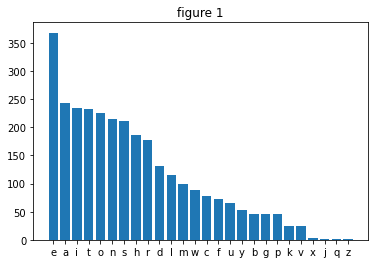

In [225]:
plot_frequencies(data)

In [226]:
def random_set(text,size): 
    i = randrange(len(text))
    j = i + size 
    chars = ""
    for k in range(i,j):
        chars += text[k%len(text)]
    return chars

In [252]:
# We are going to encrypt a message with a small secret key and a large one to see the diffrence 
message_size = len(data)//4
secret_key_size = message_size
message = 'To Sherlock Holmes she is always the woman'.lower()
secret_key = vigener_key_generator(secret_key_size)
cipher_text = vigenere_encrypt_decrypt(message,secret_key)
assert message==vigenere_encrypt_decrypt(cipher_text,secret_key,encrypt=False), "Something want wrong "

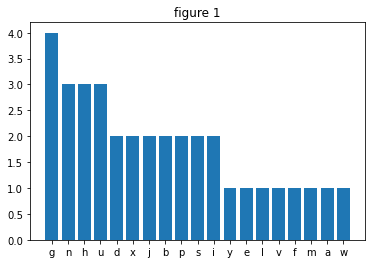

In [253]:
plot_frequencies(cipher_text)

we observe that the frequency of the letter are the same (each 4 letters) , so to have a very secure cryptosystem, the proba of a message must be independent of the cipher_text P(m|c) = P(m) 